In [ ]:
%run data_cleaning.ipynb

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


/var/folders/qz/xwx1r5sx2k9dgf6nxmgph3200000gn/T/ipykernel_13772/3090414612.py:19: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  temp_df.iloc[col][value] = na
/var/folders/qz/xwx1r5sx2k9dgf6nxmgph3200000gn/T/ipykernel_13772/3090414612.py:19:

In [29]:
def extract_series(df):
    df_temp = df
    # Convert 'id' column to string type
    df_temp['id'] = df_temp['id'].astype(str)
    # Add a new column 'series' which is the first three digits of 'id'
    df_temp['series'] = df_temp['id'].str[:3].astype(int)

    # Read the series.csv file
    series = pd.read_csv('Series Name.csv')

    # Merge data with series on the 'series' column from data and 'series_id' column from series
    df_temp_1 = df_temp.merge(series, left_on='series', right_on='Series Name ID', how='left')

    cols = df_temp_1.columns.tolist()
    cols.insert(1, cols.pop(cols.index('Series Name')))
    df_temp_1 = df_temp_1[cols]
    df_temp_1.drop(columns=['Series Name ID', 'series'], inplace=True)

    return df_temp_1

In [30]:
def extract_contry(df):
    df_temp = df
    # Add a new column 'country' which is the fourth and fifth digits of 'id'
    df_temp['country'] = df_temp['id'].str[3:5].astype(int)

# Read the country.csv file
    country = pd.read_csv('Country Name.csv')

# Merge data_series with country on the 'country' column from data_series and 'country_id' column from country
    df_temp_1 = df_temp.merge(country, left_on='country', right_on='Country Name ID', how='left')

# Insert 'location' column into the correct position
    cols = df_temp_1.columns.tolist()
    cols.insert(2, cols.pop(cols.index('Country Name')))
    df_temp_1 = df_temp_1[cols]

# Drop unnecessary columns
    df_temp_1.drop(columns=['Country Name ID', 'country'], inplace=True)
    
    return df_temp_1

In [31]:
def extract_category(df):
    df_temp = df
    # Add a new column 'country' which is the fourth and fifth digits of 'id'
    df_temp['category'] = df_temp['id'].str[5:7].astype(int)

# Read the country.csv file
    category = pd.read_excel('category_id.xlsx')

# Rename the 'id' column in the country dataframe to 'country_id'
    category.rename(columns={'id': 'category_id'}, inplace=True)

# Merge data_series with country on the 'country' column from data_series and 'country_id' column from country
    df_temp_1 = df_temp.merge(category, left_on='category', right_on='category_id', how='left')

# Insert 'location' column into the correct position
    cols = df_temp_1.columns.tolist()
    cols.insert(3, cols.pop(cols.index('Category')))
    df_temp_1 = df_temp_1[cols]

# Drop unnecessary columns
    df_temp_1.drop(columns=['category_id', 'category'], inplace=True)

    return df_temp_1

In [ ]:
data = read_data('cleaned_data.csv')

data_series = extract_series(data)
data_country = extract_contry(data_series)
data_category = extract_category(data_country)

id                                        Series Name  \
0  0070104000007  Adjusted savings: carbon dioxide damage (curre...   
1  0100104000010   Adjusted savings: energy depletion (current US$)   
2  0110104000011  Adjusted savings: mineral depletion (current US$)   
3  0120104000012  Adjusted savings: net forest depletion (curren...   
4  0150101000015  Adolescent fertility rate (births per 1,000 wo...   

  Country Name       Category          1993          1994          1995  \
0  Afghanistan  Environmental  1.878951e+07  1.889035e+07  1.895606e+07   
1  Afghanistan  Environmental  2.889968e+06  2.514651e+06  2.155011e+06   
2  Afghanistan  Environmental  0.000000e+00  0.000000e+00  0.000000e+00   
3  Afghanistan  Environmental  2.147732e+07  2.290039e+07  2.382507e+07   
4  Afghanistan         Social  1.494610e+02  1.568350e+02  1.583150e+02   

           1996          1997          1998  ...          2014          2015  \
0  1.878242e+07  1.821171e+07  1.780392e+07  ...  1.643133e+08  2.068983e+08   
1  2.452002e+06  1.920184e+06  1.070375e+06  ...  1.986275e+07  1.129754e+07   
2  0.000000e+00  0.000000e+00  0.000000e+00  ...  4.721533e+05  3.051536e+05   
3  2.183181e+07  2.402106e+07  2.278064e+07  ...  4.450926e+07  4.696891e+07   
4  1.576030e+02  1.587610e+02  1.559420e+02  ...  8.406900e+01  8.104300e+01   

           2016          2017          2018          2019          2020  \
0  1.903312e+08  1.788537e+08  2.378150e+08  2.479358e+08  2.323007e+08   
1  1.389760e+07  2.317650e+07  3.041629e+07  1.935435e+07  1.161018e+06   
2  3.888372e+05  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
3  5.182773e+07  4.399937e+07  4.422070e+07  5.172933e+07  4.838257e+07   
4  7.813000e+01  7.530000e+01  7.302100e+01  7.096700e+01  6.887700e+01   

           2021          2022          2023  
0  1.822300e+08  2.554767e+08  2.653056e+08  
1  2.714217e+06  1.977231e+07  2.049601e+07  
2  0.000000e+00  1.373352e+05  1.429700e+05  
3  4.737678e+07  5.125604e+07  5.241063e+07  
4  6.659900e+01  6.533900e+01  5.661966e+01  

[5 rows x 35 columns]

In [49]:
code = '010'

df = read_data('raw_clean.csv')
df_temp = df[df['id'].str[:3] == code]

df_temp = df_temp.set_index('id')

# 检查 df_temp 是否为空
if not df_temp.empty:
    df_clean = fill_na_with_linear_reg(df_temp)
    # 检查 df_temp 是否有足够的行数
    if len(df_temp) > 0:
        na_index = df_temp.iloc[0].isna()[df_temp.iloc[0].isna()].index
        print(na_index)
    else:
        print("df_temp has no rows.")
else:
    print("df_temp is empty.")


/var/folders/qz/xwx1r5sx2k9dgf6nxmgph3200000gn/T/ipykernel_13772/3090414612.py:19: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  temp_df.iloc[col][value] = na
/var/folders/qz/xwx1r5sx2k9dgf6nxmgph3200000gn/T/ipykernel_13772/3090414612.py:19:

IndexError: single positional indexer is out-of-bounds

In [ ]:
def extract_specific(code):
    df = read_data('rawdatafull.csv')
    df_temp = df[df['id'].str[:3] == code]
    df_clean = fill_na_with_linear_regression(df_drop)
    df_transpose_2 = df_clean.transpose()
    df_transpose_2.reset_index(inplace=True)
    df_series = extract_series(df_transpose_2)
    df_country = extract_contry(df_series)
    df_category = extract_category(df_country)

    return df_category

In [117]:
def extract_specific_bigger_zero(code):
    df = extract_specific(code)
    years = [str(year) for year in range(1993, 2024)]
    df[df[years] < 0] = 0

    return df

In [118]:
gdp = extract_specific_bigger_zero(code = '185')
gdp.to_excel('gdp.xlsx', index=False)
gdp.head()

id             Series     location    Category             1993  \
0  1850105000185  GDP (current LCU)  Afghanistan  Economical                0   
1  1850205000879  GDP (current LCU)    Australia  Economical   444229000000.0   
2  1850305001573  GDP (current LCU)      Austria  Economical   160297645000.0   
3  1850405002267  GDP (current LCU)   Bangladesh  Economical  1253694434000.0   
4  1850505002961  GDP (current LCU)      Belgium  Economical   192721412000.0   

              1994             1995             1996             1997  \
0                0                0                0                0   
1   466617000000.0   495846000000.0   528969000000.0   556665000000.0   
2   168292833000.0   175916998000.0   181541916000.0   187778736000.0   
3  1354123301400.0  1525177900500.0  1899334000000.0  2060032000000.0   
4   203106897000.0   210489100000.0   214287100000.0   224101500000.0   

              1998  ...              2014              2015              2016  \
0                0  ...   1176469485800.0   1222756495400.0   1222916881100.0   
1   589240000000.0  ...   1599333000000.0   1624165000000.0   1657914000000.0   
2   195274450000.0  ...    330113483000.0    342083540000.0    355665600000.0   
3  2269299000000.0  ...  13436744000000.0  15158023000000.0  20758211000000.0   
4   232623800000.0  ...    404958300000.0    415538000000.0    428467100000.0   

               2017              2018              2019              2020  \
0   1285460326500.0   1327690394700.0   1469596303300.0   1534966000000.0   
1   1757655000000.0   1842045000000.0   1947319000000.0   1981663000000.0   
2    367294903000.0    383234317000.0    395706770000.0    380317879000.0   
3  23243072000000.0  26392481000000.0  29514285000000.0  31704694000000.0   
4    443407200000.0    459491800000.0    479444900000.0    463750900000.0   

               2021              2022              2023  
0   1251172000000.0   1283441000000.0   1357275145600.0  
1   2085822000000.0   2330329000000.0   2567513000000.0  
2    406232064000.0    448007445000.0    473226718000.0  
3  35301848000000.0  39717164000000.0  44908417000000.0  
4    506023200000.0    563543600000.0    596320600000.0  

[5 rows x 35 columns]

In [ ]:
#clean = data_category[~data_category['Series'].str.contains('GDP')]
#clean_2 = data_category[~data_category['Series'].str.contains('current US')]
#clean_3 = clean_2[~clean_2['Series'].str.contains('constant 2015 US')]
#clean_4 = clean_3[~clean_3['Series'].str.contains('constant LCU')]


In [191]:

clean_8 = data_category[data_category['location'] != 'World']
clean_8.to_excel('data.xlsx', index=False)

In [193]:
def getting_category(category):
    df = pd.read_excel('data.xlsx')
    df_temp = df[df['Category'] == category]
    df_transpose = df_temp.transpose()
    df_drop_id = df_transpose.drop(df_transpose.index[0])
    df_drop_id.columns = df_drop_id.loc['location'] + '_' + df_drop_id.loc['Series']
    df_drop_id = df_drop_id.drop(df_drop_id.index[0:3])
    
    return df_drop_id

In [188]:
getting_category('Social').to_excel('social.xlsx', index=False)
getting_category('Political').to_excel('political.xlsx', index=False)
getting_category('Economical').to_excel('economic.xlsx', index=False)
getting_category('Environmental').to_excel('environmental.xlsx', index=False)
getting_category('Cultural').to_excel('cultural.xlsx', index=False)

In [194]:
y_data = pd.read_excel('qol.xlsx')

y_data.index = y_data['Indicator Name']
y_data.drop(columns=['Indicator Name', 'Country Name', 'Country Code', 'Indicator Code'], inplace=True)

y_transpose = y_data.transpose()
y_transpose = y_transpose.replace("..", np.nan)
y_clean = fill_na_with_linear_regression(y_transpose)
y = y_clean.transpose()

y.index

/var/folders/qz/xwx1r5sx2k9dgf6nxmgph3200000gn/T/ipykernel_44453/891530702.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y_transpose = y_transpose.replace("..", np.nan)


Index(['Primary completion rate, total (% of relevant age group)',
       'Mortality rate, infant (per 1,000 live births)',
       'Life expectancy at birth, total (years)', 'Literacy rate (%)',
       'Time required to get electricity (days)',
       'Individuals using the Internet (% of population)',
       'PM2.5 air pollution, mean annual exposure (micrograms per cubic meter)',
       'Annual freshwater withdrawals, total (billion cubic meters)',
       'Poverty headcount ratio at societal poverty line (% of population)',
       'World medium voter turnout in election'],
      dtype='object', name='Indicator Name')

In [1]:
def normalize_data(df):
    df_temp = df
    df_temp = df_temp.apply(lambda x: (x - np.min(x)) / (np.max(x) - np.min(x)))
    
    return df_temp

In [195]:
life_expectancy = 0.9 * (y.loc['Life expectancy at birth, total (years)'] - y.loc['Life expectancy at birth, total (years)'].min()) / (y.loc['Life expectancy at birth, total (years)'].max() - y.loc['Life expectancy at birth, total (years)'].min())
morality = 0.1 * (1 -  (y.loc['Mortality rate, infant (per 1,000 live births)'] - y.loc['Mortality rate, infant (per 1,000 live births)'].min()) / (y.loc['Mortality rate, infant (per 1,000 live births)'].max() - y.loc['Mortality rate, infant (per 1,000 live births)'].min()))

health = life_expectancy + morality
health

1993    0.000000
1994    0.029926
1995    0.054557
1996    0.087473
1997    0.130020
1998    0.165046
1999    0.202573
2000    0.243106
2001    0.287050
2002    0.323694
2003    0.359694
2004    0.392905
2005    0.436103
2006    0.483208
2007    0.517414
2008    0.540748
2009    0.589592
2010    0.623544
2011    0.665340
2012    0.700696
2013    0.736665
2014    0.774395
2015    0.800810
2016    0.832234
2017    0.857010
2018    0.885118
2019    0.909203
2020    0.825504
2021    0.721213
2022    0.799919
2023    1.000000
dtype: float64

In [177]:
primary = 0.8 * (y.loc['Primary completion rate, total (% of relevant age group)'] - y.loc['Primary completion rate, total (% of relevant age group)'].min()) / (y.loc['Primary completion rate, total (% of relevant age group)'].max() - y.loc['Primary completion rate, total (% of relevant age group)'].min())
literacy = 0.2 * (  (y.loc['Literacy rate (%)'] - y.loc['Literacy rate (%)'].min()) / (y.loc['Literacy rate (%)'].max() - y.loc['Literacy rate (%)'].min()))

education = primary + literacy
education

1993    0.033894
1994    0.007091
1995    0.123378
1996    0.079860
1997    0.120145
1998    0.158635
1999    0.186260
2000    0.229887
2001    0.359854
2002    0.389167
2003    0.407711
2004    0.450154
2005    0.507473
2006    0.529302
2007    0.618946
2008    0.739765
2009    0.800564
2010    0.797579
2011    0.760364
2012    0.758434
2013    0.754986
2014    0.749511
2015    0.735877
2016    0.778805
2017    0.771237
2018    0.782773
2019    0.781663
2020    0.793652
2021    0.841702
2022    0.996428
2023    0.750211
dtype: float64

In [ ]:
electricity = 0.5 * (1 - (y.loc['Time required to get electricity (days)'] - y.loc['Time required to get electricity (days)'].min()) / (y.loc['Time required to get electricity (days)'].max() - y.loc['Time required to get electricity (days)'].min()))
internet = 0.5 * (  (y.loc['Individuals using the Internet (% of population)'] - y.loc['Individuals using the Internet (% of population)'].min()) / (y.loc['Individuals using the Internet (% of population)'].max() - y.loc['Individuals using the Internet (% of population)'].min()))

infrastruce = electricity + internet
infrastruce

1993    0.000000
1994    0.018017
1995    0.037083
1996    0.058536
1997    0.080529
1998    0.105362
1999    0.133129
2000    0.165322
2001    0.191676
2002    0.226606
2003    0.255792
2004    0.286414
2005    0.314704
2006    0.344015
2007    0.382996
2008    0.418258
2009    0.450809
2010    0.506749
2011    0.535763
2012    0.561886
2013    0.573464
2014    0.617648
2015    0.674213
2016    0.706303
2017    0.736554
2018    0.779308
2019    0.826351
2020    0.889751
2021    0.927988
2022    0.961019
2023    1.000000
dtype: float64

In [179]:
PM= 0.2 * (1 - (y.loc['PM2.5 air pollution, mean annual exposure (micrograms per cubic meter)'] - y.loc['PM2.5 air pollution, mean annual exposure (micrograms per cubic meter)'].min()) / (y.loc['PM2.5 air pollution, mean annual exposure (micrograms per cubic meter)'].max() - y.loc['PM2.5 air pollution, mean annual exposure (micrograms per cubic meter)'].min()))
water = 0.8 * (  (y.loc['Annual freshwater withdrawals, total (billion cubic meters)'] - y.loc['Annual freshwater withdrawals, total (billion cubic meters)'].min()) / (y.loc['Annual freshwater withdrawals, total (billion cubic meters)'].max() - y.loc['Annual freshwater withdrawals, total (billion cubic meters)'].min()))

environmental = PM + water
environmental

1993    0.070563
1994    0.099117
1995    0.126527
1996    0.151761
1997    0.174667
1998    0.196466
1999    0.218438
2000    0.241940
2001    0.267365
2002    0.294112
2003    0.322062
2004    0.351041
2005    0.380808
2006    0.417370
2007    0.462689
2008    0.510508
2009    0.554470
2010    0.588517
2011    0.556120
2012    0.540233
2013    0.533333
2014    0.552637
2015    0.557786
2016    0.673270
2017    0.797755
2018    0.774771
2019    0.855187
2020    0.808878
2021    0.877279
2022    0.863830
2023    0.891636
dtype: float64

In [180]:
poverty= 0.9 * (1 - (y.loc['Poverty headcount ratio at societal poverty line (% of population)'] - y.loc['Poverty headcount ratio at societal poverty line (% of population)'].min()) / (y.loc['Poverty headcount ratio at societal poverty line (% of population)'].max() - y.loc['Poverty headcount ratio at societal poverty line (% of population)'].min()))
voter = 0.1 * (  (y.loc['World medium voter turnout in election'] - y.loc['World medium voter turnout in election'].min()) / (y.loc['World medium voter turnout in election'].max() - y.loc['World medium voter turnout in election'].min()))

social_inclusion = poverty + voter
social_inclusion

1993    0.100000
1994    0.172373
1995    0.220958
1996    0.253708
1997    0.266916
1998    0.236332
1999    0.267150
2000    0.278970
2001    0.299130
2002    0.324158
2003    0.357834
2004    0.407498
2005    0.447121
2006    0.448209
2007    0.485823
2008    0.507835
2009    0.535178
2010    0.573026
2011    0.632265
2012    0.639143
2013    0.687572
2014    0.703098
2015    0.733063
2016    0.736309
2017    0.763033
2018    0.798793
2019    0.802269
2020    0.802269
2021    0.802678
2022    0.812981
2023    0.900000
dtype: float64

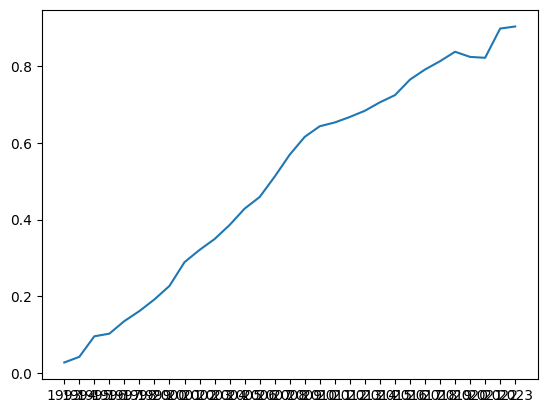

In [201]:
y = health * 0.3 + education * 0.3 + infrastruce * 0.2 + environmental * 0.1 + social_inclusion * 0.1
y.to_excel('y.xlsx')

plt.plot(y)

In [203]:
y.values

array([0.02722457, 0.04185731, 0.09554546, 0.10245362, 0.13531357,
       0.16145677, 0.19183425, 0.22705341, 0.28905601, 0.32100641,
       0.34936957, 0.38605446, 0.42880663, 0.45911382, 0.51235853,
       0.56964006, 0.61617328, 0.64384107, 0.65370207, 0.66805392,
       0.6842785 , 0.70627504, 0.72493365, 0.7655301 , 0.79186383,
       0.81358541, 0.83827551, 0.82481201, 0.8224678 , 0.89878897,
       0.9042269 ])

In [ ]:
x_data = pd.read_excel('data.xlsx')



0        Afghanistan
1        Afghanistan
2        Afghanistan
3        Afghanistan
4        Afghanistan
            ...     
11929    South Sudan
11930    South Sudan
11931    South Sudan
11932    South Sudan
11933    South Sudan
Name: location, Length: 11934, dtype: object

In [214]:
x_data.index = x_data['id']
x_clean = x_data.drop(columns=['id', 'location', 'Series', 'Category'])
x = x_clean.transpose()
x.head()

id    70104000007    100104000010   110104000011   120104000012   \
1993   1.878951e+07   2.889968e+06            0.0   2.147732e+07   
1994   1.889035e+07   2.514651e+06            0.0   2.290039e+07   
1995   1.895606e+07   2.155011e+06            0.0   2.382507e+07   
1996   1.878242e+07   2.452002e+06            0.0   2.183181e+07   
1997   1.821171e+07   1.920184e+06            0.0   2.402106e+07   

id    150101000015   160101000016   170101000017   180104000018   \
1993        149.461          500.0          500.0       379340.0   
1994        156.835          500.0          500.0       378130.0   
1995        158.315          500.0          500.0       377630.0   
1996        157.603          520.0          500.0       377570.0   
1997        158.761          530.0          500.0       377950.0   

id    270104000027   280104000028   ...  5614001027627  5624001027628  \
1993      22.930160          300.0  ...           16.5           28.3   
1994      22.400003          300.0  ...           16.1           27.7   
1995      21.869847          300.0  ...           15.7           27.2   
1996      21.339690          300.0  ...           15.3           26.5   
1997      20.809534          300.0  ...           14.9           25.9   

id    5634001027629  5644001027630  5994001027665  6224002027688  \
1993           34.3           37.9      4181577.0          1.037   
1994           33.3           37.2      4272523.0          1.037   
1995           32.3           36.6      4396339.0          1.037   
1996           31.2           35.8      4499978.0          1.037   
1997           30.0           35.0      4620898.0          1.036   

id    6724004027738  6844001027750  6934003027759  6944001027760  
1993            0.0       774425.0          41.25         3200.0  
1994            0.0       798661.0          41.25         3300.0  
1995            0.0       829497.0          41.25         3600.0  
1996            0.0       856947.0          41.25         3700.0  
1997            0.0       888238.0          43.75         3800.0  

[5 rows x 11934 columns]

In [215]:
# Check if all columns in x are numeric
is_numeric = x.apply(lambda col: pd.to_numeric(col, errors='coerce').notna().all())
is_numeric

id
70104000007      True
100104000010     True
110104000011     True
120104000012     True
150101000015     True
                 ... 
6224002027688    True
6724004027738    True
6844001027750    True
6934003027759    True
6944001027760    True
Length: 11934, dtype: bool

In [221]:
x.isna().sum().sort_values(ascending=False)

id
6944001027760    0
70104000007      0
100104000010     0
110104000011     0
120104000012     0
                ..
540104000054     0
530104000053     0
520104000052     0
510104000051     0
500104000050     0
Length: 11934, dtype: int64

In [234]:
len(x.columns)

11935

In [239]:
# Initialize an empty list to store the results
p_values_list = []

# Loop through each column in x
for column in x.columns:
    # Fit the model
    model = sm.OLS(y, sm.add_constant(x[column])).fit()
    
    # Check if the model has more than one parameter
    if len(model.params) > 1:
        # Get the p-value for the column
        p_value = model.pvalues[1]  # p-value for the column (not the constant)
        
        # Append the column id and p-value to the list
        p_values_list.append({'id': column, 'p_value': p_value})

# Convert the list to a DataFrame for better visualization
p_values_df = pd.DataFrame(p_values_list)

# Display the DataFrame
p_values_df.head()

KeyError: 1

In [225]:
# 假设 x 和 y 是你的自变量和因变量
# 添加常数项到自变量
x = sm.add_constant(x)

# 计算 VIF
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif["features"] = x.columns

# 打印 VIF 值
vif.to_csv('vif.csv')

# 删除 VIF 值高的变量（示例）
# 例如，删除 VIF 值大于 10 的变量
x = x.loc[:, vif["VIF Factor"] <= 10]

# 拟合模型
model = sm.OLS(y.values, x).fit()

# 获取 p 值
pvalues = model.pvalues
pvalues.to_csv('pvalues.csv')

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


KeyboardInterrupt: 